# Az L-rendszer

## Bevezetés

Az L-system (Lindenmayer rendszer) egy matematikai formális nyelv. Sorozatokat hoz létre azáltal, hogy ismételten alkalmaz bizonyos szabályokat egy kiindulási állapoton. Az "L" az L-rendszerben Aristid Lindenmayer magyar kutató nevéből származik. Lindenmayer élesztőgombákkal foglalkozott. Az L-rendszer eredetileg egyszerű biológiai struktúrák (gombák és baktériumok) fejlődésének leírására és modellezésére készült, ám később növények és más élőlények alaktanára is használták.

Formálisan következőképpen adható meg: 

 <b>G = (T; s; H)</b>, ahol <b>T</b> egy véges ábécé, <b>s</b> az axióma, <b>H</b> a szabályok halmaza. 


 - A <b>T</b> véges ábéce szimbólumokat tartalmaz, például X, F, +, [, ]. 
 
 - Az <b>s</b> axióma a kezdeti állapotot jelöli.
 
 - A <b>H</b> szabályok halmaza, amelyek leírják az adott L-rendszerben végbemenő átmeneteket. 
 

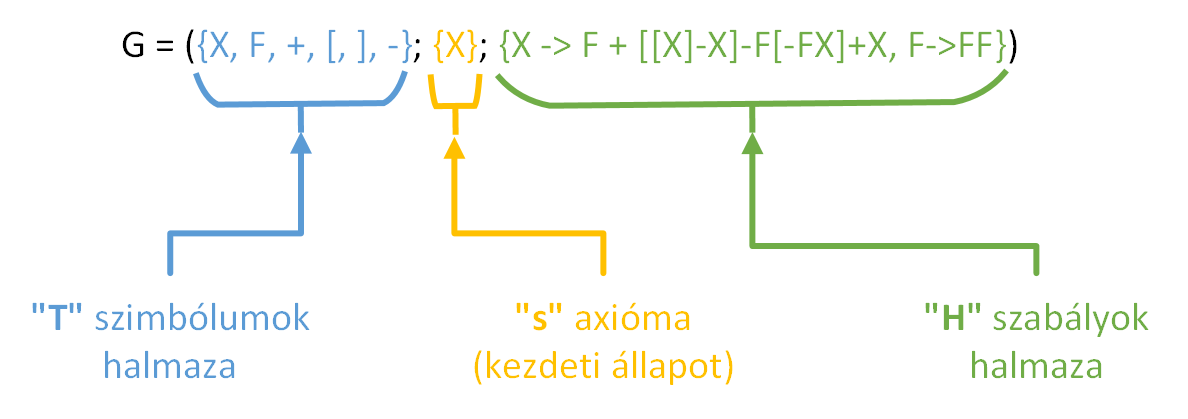

A <b>karakterek</b> és <b>szabályok</b> iteratív alkalmazásával geometriai alakzatokat lehet készíteni. Az alakzatok létrejötte az </b>axiómából</b> indul, majd a rendszer szabályait ismételten alkalmazva alakulnak ki. Minden iterációban a karakterláncot a szabályoknak megfelelően módosítják, és így alakul ki a végleges geometriai forma.


Az L-rendszerek rendkívül hatékonyak lehetnek a növények struktúrájának modellezésére. A növények ágazódása, leveleinek elrendeződése és számos más aspektusa leírható szabályokkal és iterációkkal. Például, egy egyszerű L-rendszer segítségével lehetséges faágakat és leveleket modellezni. Játékfejlesztésben például procedurális térképgenerálás, terep, növényzet létrehozásánál használatos. 

Az eredeti rendszerek determinisztikusak és önhasonlóság jellemzi őket.

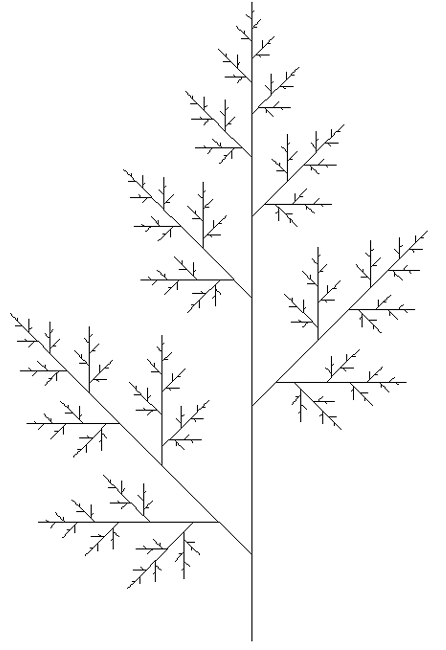

Kipróbálható: https://kevs3d.co.uk/dev/lsystems/

### L-rendszer megvalósítása:

1. Szabályok értelmezése - pl.: H={F→F+F−F−F+F} - szabály azt jelenti, hogy minden F szimbólum az L-rendszerben az F+F−F−F+F karakterláncra változik.
2. Nyelvtant alkalmazó függvény elkészítése - szabály(ok) alkalmazásával létrehozza a soron következő iteráció kimenetét, ami egy karakterlánc és <b>szó</b>-nak nevezünk.
3. Megjelenítésért felelős függvény elkészítése - a karakterlánc egyes szimbólumai információt hordoznak, ezeket grafikus instrukciókká alakítjuk és ábrázoljuk.

## 1. Egyszerű szabályrendszer kialakítása

Adott a G = ({a, b}; a; {a → b}) L-rendszer. Az ismétlések (iterációk) során alkalmazzuk a szabályokat az aktuális sorozatra, létrehozva egyre bonyolultabb és részletesebb struktúrákat. Az L-rendszer axiómája "A" és a szabály az, hogy minden "A" cserélődik "AB" sorozatra, akkor az iterációk során a sorozat így fejlődik:

0.	Iteráció: A (kezdeti állapot, maga az axióma)
1.	Iteráció: AB (az "A" helyettesítve "AB"-vel)
2.	Iteráció: ABB 
3.	Iteráció: ABBB 

<b>Pszeudokód:</b>

A program bekéri a végrehajtandó iterációk számát, utána végigmegy az aktuális szó minden karakterén és a <code>"new"</code> nevű változóhoz szabályok alapján hozzáadja a szükséges karaktereket. Minden iteráció végén kiírja a szót, <code>"axiom"</code> nevű változót aktualizálja és a <code>"new"</code> változót kiüríti.

In [ ]:
#({A,B}; A; {A->AB, B->B})


## <p style="color:green;">1.1. Feladat

Ábrázolja a következő rendszer 4 iterációját az alábbi specifikáció alapján!

<b>Kezdeti állapot</b>: F

<b>Szabályok</b>: (F → FR), (R → FR)

Ahol:
- "F" jelentése "előre rajzol"
- "R" jelentése "jobbra fordul 90°-kal" 

## <p style="color:green;">1.2. Feladat </p>

Az előző kódok alapján készítse el a következő rendszer megvalósítását:

<b>Kezdeti állpot</b>: X 

<b>Szabályok</b>: (X → F+[[X]-X]-F[-FX]+X), (F → FF)

Ahol:
- "F" jelentése "előre rajzol"
- "−" jelentése "jobbra fordul 25°-kal" 
- "+" jelentése "balra fordul 25°-kal" 
- "X" jelentése nem felel meg semmiféle rajzolási műveletnek, és a görbe alakulásának irányítására szolgál
- "[" jelentése a jelenlegi pozíció és szög értékek mentése
- "]" jelentése az utolsó mentett pozíció és szög visszaállítása és a mentett adatsor törlése 

## 2. Egyszerű szabályrendszer kialakítása függvény formájában

A Python nyelv szintaxisa alapján az előző rövid kódot függvénnyé alakítottuk és kicsit módosítottuk. Ez segíti a kód későbbi felhasználhatóságát.

In [ ]:
axiom = 'F'

## 3. Nyelvtan szavainak ábrázolása - Turtle Graphics

Turtle egy könnyen kezelhető könyvtár grafikai munkák elvégzésére  
[Turtle graphics dokumentáció](https://docs.python.org/3/library/turtle.html)  

A <code>turtleStart()</code> függvény tartalmazza a grafikára vonatkozó alap beállításokat: középre helyezi a kurzort, engedélyezi a rajzolást és meghatározza a használt vászon(kép) méretét.

- <code>penup()</code> - megszünteti a rajzolást (következő <i>pendown()</i> eseményig nem rajzol vonalat) 
- <code>pendown()</code> - előző utasítás párja, ez után következő parancsok rajzolnak
- <code>speed()</code> - meghatározza a rajzolás sebességét, értéke megadható "slowest" - "fastest" között, vagy egész számmal 1-10-ig.
- <code>hideturtle()</code> - elrejti kurzort
- <code>screensize()</code> - megjelnítéshez használt vászon méretét és színét lehet állítani, <code>canvwidth</code>, <code>canvheight</code>, <code>bg</code> paraméterek megadásával
- <code>exitonclick()</code> - bezárja az elkészített ábrát
- <code>tracer()</code> - alapértelmezett esetben (1) mutatja az animációt, 0 érték esetén a kész ábrát mutatja

<b>Alapvető vezérlési utasítások</b>

- <code>forward()</code> - előre megy
- <code>left()</code> - balra fordul
- <code>right()</code> - jobbra fordul
- <code>goto()</code> - adott koordinátára rakja a kurzort

## <p style="color:green;">3.1. Feladat </p>

A Koch-görbének több változata is ismert. Készítsük el az alábbi nyelvtan által megadott verziót!

G=({F,+,−};F;{F→F-F++F-F})


Ahol:
- "F" jelentése "előre" 
- "+" jelentése "fordulj balra 60°-ot"
- "-" jelentése "fordulj jobbra 60°-ot"

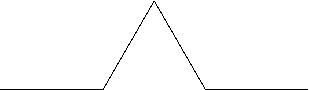

Változtassuk meg a kezdeti állapotot a következők szerint:

G=({F,+,−};F++F++F;{F→F-F++F-F})

## 4. Ágak ábrázolása és a verem adatszerkezet

A fa megrajzolása áganként történik olyan módon, hogy először a program megrajzol egy teljes ágat, utána visszatér a "törzshöz" és új ág rajzolásába kezd. Ebből adódik a probléma, hogy hogyan fog visszatérni a megfelelő helyre program? Az ágak kezdetét mindig elágazás (jelölést tekintve általában +,- szimbólumok) jelzi. 

A verem egy LIFO (Last In First Out) adatszerkezet, a mi esetünkben az aktuális pozíciót és szöget tárolja el. Adattárolásra használjuk. 

Képzeld el,hogy vannak játékkockáid, amiket csak egymásra rakhatsz, mintha egy tornyot építenél. A torony szétszedésénél, mindig a legutolsó kocka, amit tettél rá (vagyis a legfelső), veheted le először. 

Két jellegzetes hozzá kapcsolódó parancs a <code>push</code> (<b>Python</b> esetén <code>append</code>) és a <code>pop</code>:

<code>push</code> - verembe helyezi a kijelölt adatot

<code>pop</code> - eltávolítja az utoljára verembe helyezett adatot

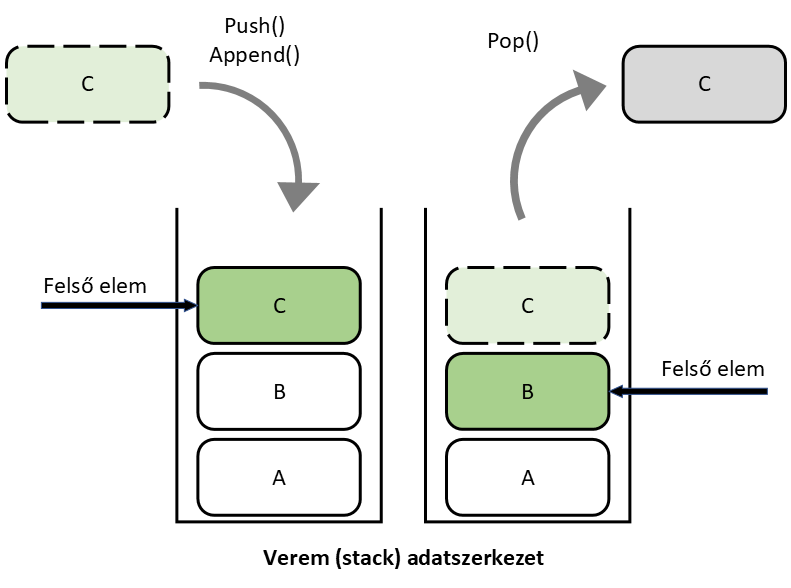

### 4.1. Példa - egyszerű példa verem adatszerkezetre

In [ ]:
verem = []

[1, 2, 3]
[1, 2]


A mi esetünkben az ág kezdeténél lévő pozíciót és szöget fogja eltárolni.

- <code>turtle.pos()</code> - teknős aktuális X és Y koordinátája
- <code>turtle.heading()</code> - szög, azaz merre néz a teknős

- append (hozzáad): Ha kigenerált nyelvben a soron következő karakter a '[' , akkor a jelenlegi állapotot (pozíciót és szöget) hozzáadjuk a veremhez. 
verem.append((turtle.pos(), turtle.heading()))
- pop (levesz): Ha kigenerált nyelvben a soron következő karakter a ']' , akkor kivesszük a veremből a legfelső elemét. 
<code>pozicio, szog_irany = verem.pop()</code>
Ezek után visszatérünk a veremből kiszedett pozícióhoz és folytatjuk a rajzolást a tárolt szöggel. 

<code>turtle.goto(pozicio)</code> - adott helyre mozgatja a teknőst

<code>turtle.setheading(szog_irany)</code> - beállítja a szöget

## 5. Egyszerű növény ábrázolása

Az alábbi példa egy egyszerű növény grafikus ábrázolását mutatja be. A rendszer az "X" és "F" változókat, valamint a "+" és "-" szimbólumokat használja. A szabályok a következők:


G = ({X, F, +, [, ], -}; X; {X → F+[[X]-X]-F[-FX]+X, F → FF})

Ahol:
- "F" jelentése "előre" 
- "+" jelentése "fordulj balra 25°-ot"
- "-" jelentése "fordulj jobbra 25°-ot"

### Ipyturtle3

Ipyturtle képes Jupyter jegyzetben beágyazott megjelenítésre, azonban a parancskészlete limitált.

Telepítése: <code>%pip install ipyturtle3</code>

[ipyturtle3 dokumentáció](https://github.com/williamnavaraj/ipyturtle3)

| **Parancsok**                        |                          |                         |
|---------------------------------|----------------------------------|---------------------------------|
| `position(self)`                | `goto(self, x, y=None)`          | `left(self, degree=None)`       |
| `forward(self, length)`         | `setpos(self, x, y=None)`        | `right(self, degree=None)`      |
| `back(self, length)`            | `setposition(self, x, y=None)`   | `penup(self)`                   |
| `heading(self)`                 | `pendown(self)`                  | `isdown(self)`                  |
| `hideturtle(self)`              | `showturtle(self)`               | `isvisible(self)`               |
| `reset(self)`                   | `pencolor(self, r=-1, g=-1, b=-1)` |                                 |


## 6. További növények és minták leírása

## <p style="color:green;">6.1. Feladat - Kvadratikus Koch sziget</p>

G=({F,+,−};F-F-F-F;{F→F-F+F+FF-F-F+F})


Ahol:
- "F" jelentése "előre" 
- "+" jelentése "fordulj balra 90°-ot"
- "-" jelentése "fordulj jobbra 90°-ot"

## <p style="color:green;">6.2. Feladat - Sárkány-görbe</p>

G=({F,G,+,−};F;{F→F+G+,F→-F-G})


Ahol:
- "F" jelentése "előre" 
- "G" jelentése "előre"
- "+" jelentése "fordulj balra 90°-ot"
- "-" jelentése "fordulj jobbra 90°-ot"

## <p style="color:green;">6.3. Feladat - Növény élek újraírásával</p>

G=({F,+,−};F;{F→F[+F]F[-F][F]})


Ahol:
- "F" jelentése "előre"
- "+" jelentése "fordulj balra 20°-ot"
- "-" jelentése "fordulj jobbra 20°-ot"

## <p style="color:green;">6.4. Feladat - Növény csomópontok újraírásával</p>

G=({F,X,+,−};X;{X→F[+X]F[-X]+X,F→FF})


Ahol:
- "X" jelentése "előre"
- "F" jelentése "előre"
- "+" jelentése "fordulj balra 20°-ot"
- "-" jelentése "fordulj jobbra 20°-ot"

## <p style="color:green;">6.5. Feladat - Hilbert mintája</p>

G=({F,X,Y,+,−};X;{X→-YF+XFX+FY-,Y→+XF-YFY-FX+})

Ahol:
- "F" jelentése "előre"
- "X" nincs grafikus jelentése
- "Y" nincs grafikus jelentése
- "+" jelentése "fordulj balra 90°-ot"
- "-" jelentése "fordulj jobbra 90°-ot"

## <p style="color:green;">6.6. Feladat - Négyzetes Sierpinski</p>

G=({F,X,+,−};F+XF+F+XF;{X→XF-F+F-XF+F+XF-F+F-X})

Ahol:
- "F" jelentése "előre"
- "X" nincs grafikus jelentése
- "+" jelentése "fordulj balra 90°-ot"
- "-" jelentése "fordulj jobbra 90°-ot"

## <p style="color:green;">6.7. Feladat - Levél</p>

G=({F,X,+,−};X;{X→F[+X][-X]FX,F→FF})

Ahol:
- "F" jelentése "előre"
- "X" nincs grafikus jelentése
- "+" jelentése "fordulj balra 35°-ot"
- "-" jelentése "fordulj jobbra 35°-ot"